# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

23:20:47 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=30807;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=680789;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=638698;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=70810;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=422263;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=535964;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

23:20:49 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=211429;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=472163;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

23:20:50 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=709418;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=292599;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

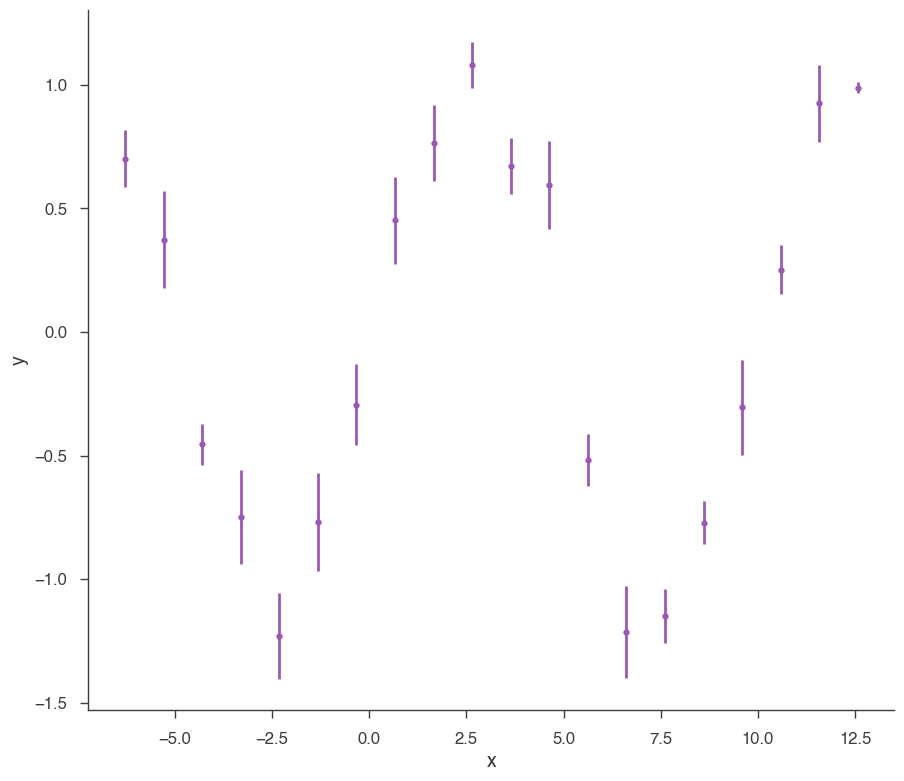

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=584371;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=964763;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:20:53 INFO      Mean acceptance fraction: 0.7014                                            ]8;id=641149;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=236264;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=275589;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=866833;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=899333;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=687730;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.018 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 -0.11 +0.10) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.431775
total,-9.431775


Values of statistical measures:

,statistical measures
AIC,23.569431
BIC,24.855014
DIC,22.988826
PDIC,2.054120


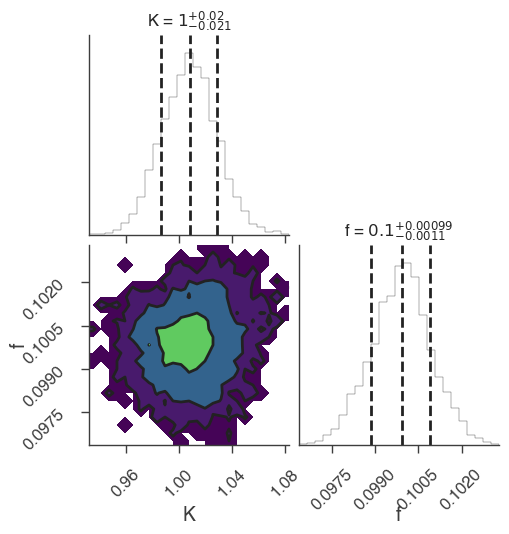

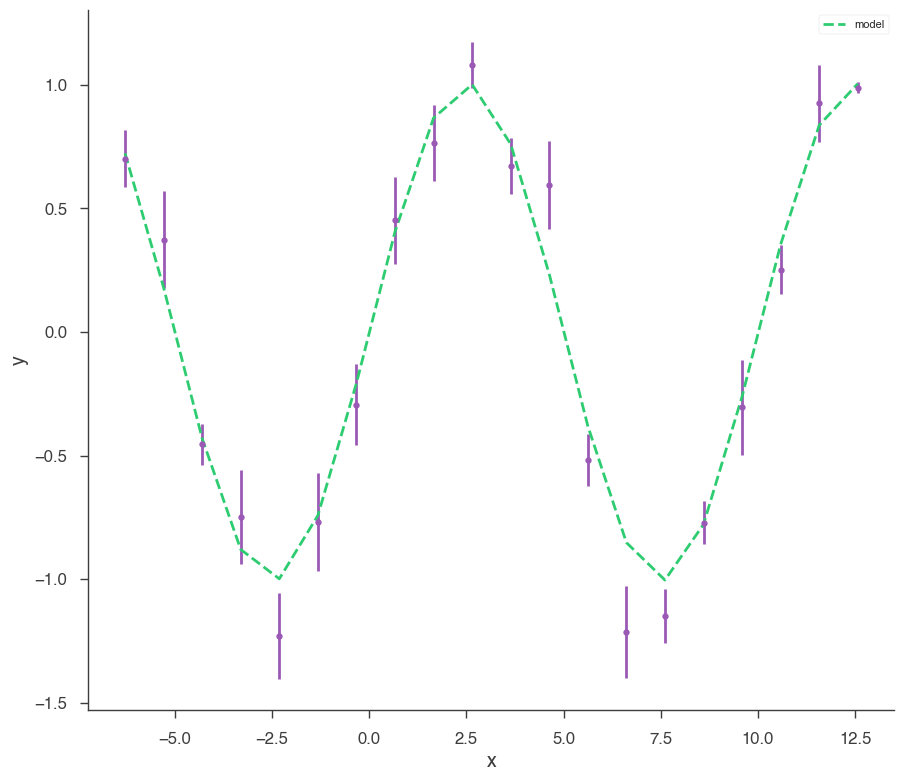

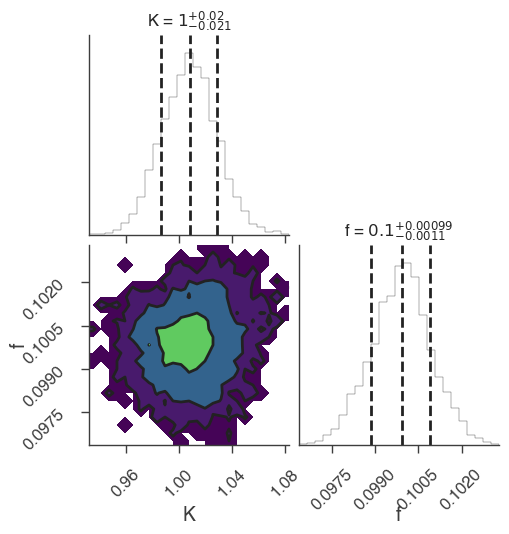

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

23:20:54 INFO      sampler set to multinest                                                ]8;id=331693;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=41097;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -17.623271390240763      +/-  0.13395386326762929     
 Total Likelihood Evaluations:         5431
 Sampling finished. Exiting MultiNest



23:20:55 INFO      fit restored to maximum of posterior                                         ]8;id=920628;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=94143;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=945959;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=521679;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.006 -0.017 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 -0.10 +0.09) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.432765
total,-9.432765


Values of statistical measures:

,statistical measures
AIC,23.571412
BIC,24.856994
DIC,22.931344
PDIC,2.016847
log(Z),-7.653690


         INFO      deleting the chain directory chains                                     ]8;id=61912;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=598906;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

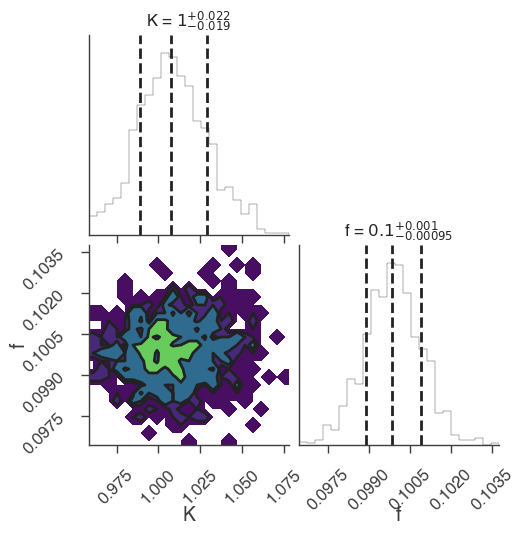

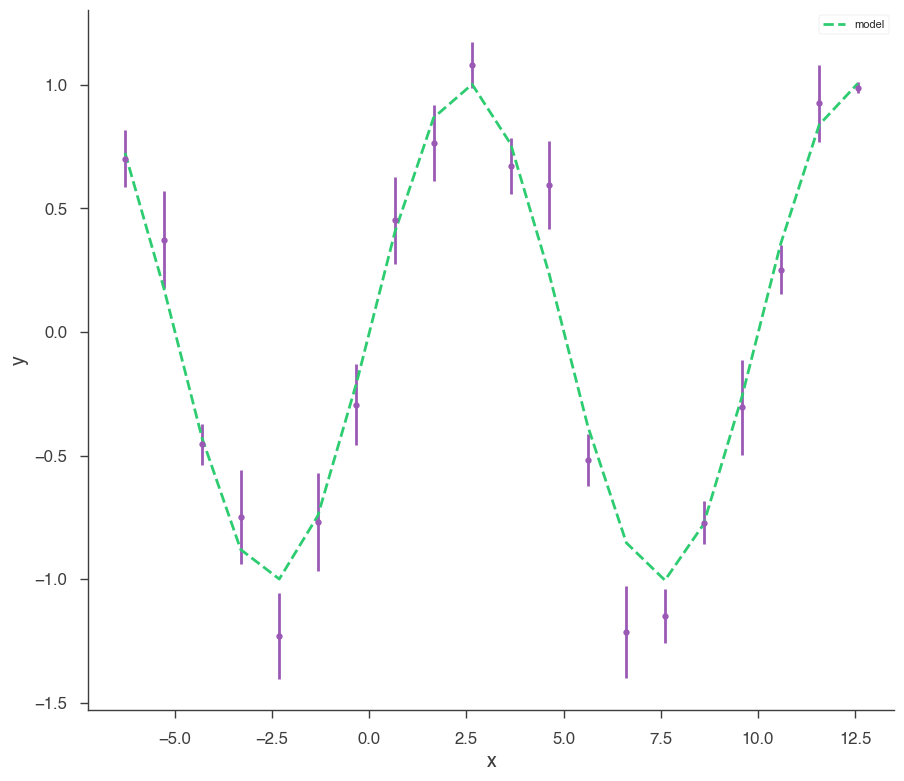

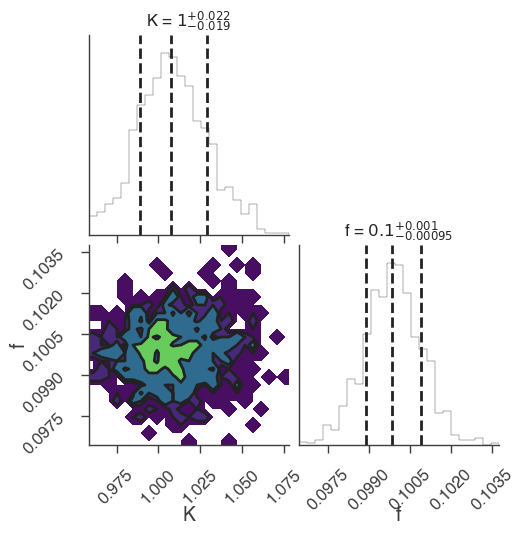

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=935650;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=853241;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

240it [00:00, 2391.73it/s, bound: 0 | nc: 1 | ncall: 722 | eff(%): 33.241 | loglstar:   -inf < -1644.345 <    inf | logz: -1651.313 +/-  0.127 | dlogz: 1639.724 >  0.409]

480it [00:00, 1777.94it/s, bound: 0 | nc: 11 | ncall: 1325 | eff(%): 36.226 | loglstar:   -inf < -863.194 <    inf | logz: -870.671 +/-  0.131 | dlogz: 858.113 >  0.409] 

668it [00:00, 1596.51it/s, bound: 0 | nc: 5 | ncall: 2115 | eff(%): 31.584 | loglstar:   -inf < -704.263 <    inf | logz: -710.412 +/-  0.118 | dlogz: 696.031 >  0.409] 

833it [00:00, 1305.33it/s, bound: 0 | nc: 13 | ncall: 3209 | eff(%): 25.958 | loglstar:   -inf < -641.870 <    inf | logz: -648.831 +/-  0.125 | dlogz: 636.504 >  0.409]

971it [00:00, 1089.05it/s, bound: 0 | nc: 4 | ncall: 4644 | eff(%): 20.909 | loglstar:   -inf < -593.365 <    inf | logz: -599.912 +/-  0.118 | dlogz: 587.030 >  0.409] 

1087it [00:00, 947.84it/s, bound: 0 | nc: 4 | ncall: 6150 | eff(%): 17.675 | loglstar:   -inf < -551.163 <    inf | logz: -558.363 +/-  0.127 | dlogz: 546.345 >  0.409]

1187it [00:01, 766.36it/s, bound: 0 | nc: 76 | ncall: 7822 | eff(%): 15.175 | loglstar:   -inf < -468.719 <    inf | logz: -478.363 +/-  0.155 | dlogz: 471.775 >  0.409]

1270it [00:01, 663.72it/s, bound: 0 | nc: 49 | ncall: 9482 | eff(%): 13.394 | loglstar:   -inf < -316.136 <    inf | logz: -325.449 +/-  0.147 | dlogz: 314.195 >  0.409]

1341it [00:01, 551.23it/s, bound: 0 | nc: 14 | ncall: 11299 | eff(%): 11.868 | loglstar:   -inf < -233.696 <    inf | logz: -242.805 +/-  0.143 | dlogz: 230.823 >  0.409]

1401it [00:01, 462.76it/s, bound: 0 | nc: 31 | ncall: 13059 | eff(%): 10.728 | loglstar:   -inf < -187.823 <    inf | logz: -197.691 +/-  0.149 | dlogz: 186.101 >  0.409]

1451it [00:02, 354.50it/s, bound: 1 | nc: 2 | ncall: 14380 | eff(%): 10.090 | loglstar:   -inf < -159.846 <    inf | logz: -169.635 +/-  0.148 | dlogz: 157.571 >  0.409] 

1622it [00:02, 577.25it/s, bound: 1 | nc: 5 | ncall: 14733 | eff(%): 11.009 | loglstar:   -inf < -99.792 <    inf | logz: -108.457 +/-  0.140 | dlogz: 95.133 >  0.409]  

1708it [00:02, 577.53it/s, bound: 2 | nc: 1 | ncall: 14951 | eff(%): 11.424 | loglstar:   -inf < -78.269 <    inf | logz: -87.699 +/-  0.142 | dlogz: 74.231 >  0.409] 

1922it [00:02, 889.16it/s, bound: 2 | nc: 1 | ncall: 15329 | eff(%): 12.538 | loglstar:   -inf < -47.456 <    inf | logz: -55.710 +/-  0.136 | dlogz: 41.510 >  0.409]

2038it [00:02, 815.79it/s, bound: 3 | nc: 1 | ncall: 15573 | eff(%): 13.087 | loglstar:   -inf < -36.941 <    inf | logz: -45.432 +/-  0.139 | dlogz: 30.938 >  0.409]

2215it [00:02, 1019.85it/s, bound: 3 | nc: 1 | ncall: 15901 | eff(%): 13.930 | loglstar:   -inf < -26.158 <    inf | logz: -34.641 +/-  0.137 | dlogz: 19.676 >  0.409]

2339it [00:02, 878.86it/s, bound: 4 | nc: 1 | ncall: 16225 | eff(%): 14.416 | loglstar:   -inf < -21.432 <    inf | logz: -29.769 +/-  0.136 | dlogz: 14.477 >  0.409] 

2534it [00:02, 1108.86it/s, bound: 4 | nc: 3 | ncall: 16582 | eff(%): 15.282 | loglstar:   -inf < -16.504 <    inf | logz: -24.969 +/-  0.136 | dlogz:  9.233 >  0.409]

2667it [00:03, 1005.61it/s, bound: 5 | nc: 3 | ncall: 16860 | eff(%): 15.819 | loglstar:   -inf < -14.331 <    inf | logz: -22.766 +/-  0.136 | dlogz:  6.693 >  0.409]

2855it [00:03, 1202.47it/s, bound: 5 | nc: 6 | ncall: 17233 | eff(%): 16.567 | loglstar:   -inf < -12.536 <    inf | logz: -20.801 +/-  0.135 | dlogz:  4.264 >  0.409]

2994it [00:03, 1091.38it/s, bound: 6 | nc: 3 | ncall: 17474 | eff(%): 17.134 | loglstar:   -inf < -11.780 <    inf | logz: -19.931 +/-  0.135 | dlogz:  3.077 >  0.409]

3190it [00:03, 1293.62it/s, bound: 6 | nc: 1 | ncall: 17818 | eff(%): 17.903 | loglstar:   -inf < -10.894 <    inf | logz: -19.125 +/-  0.134 | dlogz:  1.896 >  0.409]

3335it [00:03, 1096.22it/s, bound: 7 | nc: 1 | ncall: 18078 | eff(%): 18.448 | loglstar:   -inf < -10.407 <    inf | logz: -18.712 +/-  0.134 | dlogz:  1.287 >  0.409]

3519it [00:03, 1263.03it/s, bound: 7 | nc: 2 | ncall: 18404 | eff(%): 19.121 | loglstar:   -inf < -10.060 <    inf | logz: -18.352 +/-  0.135 | dlogz:  0.767 >  0.409]

3662it [00:03, 1003.36it/s, bound: 8 | nc: 1 | ncall: 18662 | eff(%): 19.623 | loglstar:   -inf < -9.867 <    inf | logz: -18.169 +/-  0.135 | dlogz:  0.514 >  0.409] 

3743it [00:04, 922.09it/s, +400 | bound: 8 | nc: 1 | ncall: 19190 | eff(%): 22.049 | loglstar:   -inf < -9.427 <    inf | logz: -17.735 +/-  0.135 | dlogz:  0.001 >  0.409]

23:21:00 INFO      fit restored to maximum of posterior                                         ]8;id=335845;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=93842;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=81768;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=199415;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.017 +0.024,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 +/- 0.11) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.432608
total,-9.432608


Values of statistical measures:

,statistical measures
AIC,23.571098
BIC,24.856680
DIC,22.959757
PDIC,2.040986
log(Z),-7.702170


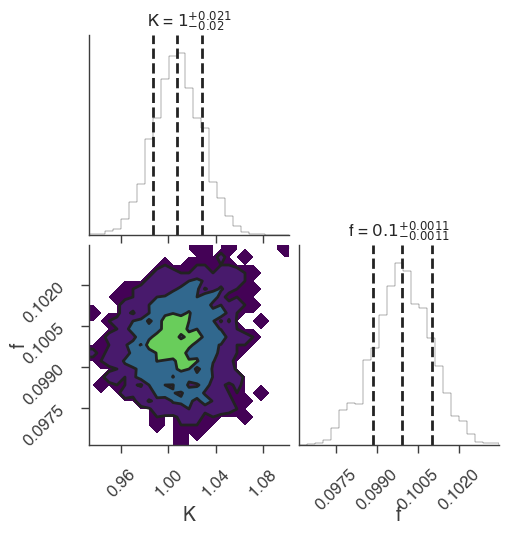

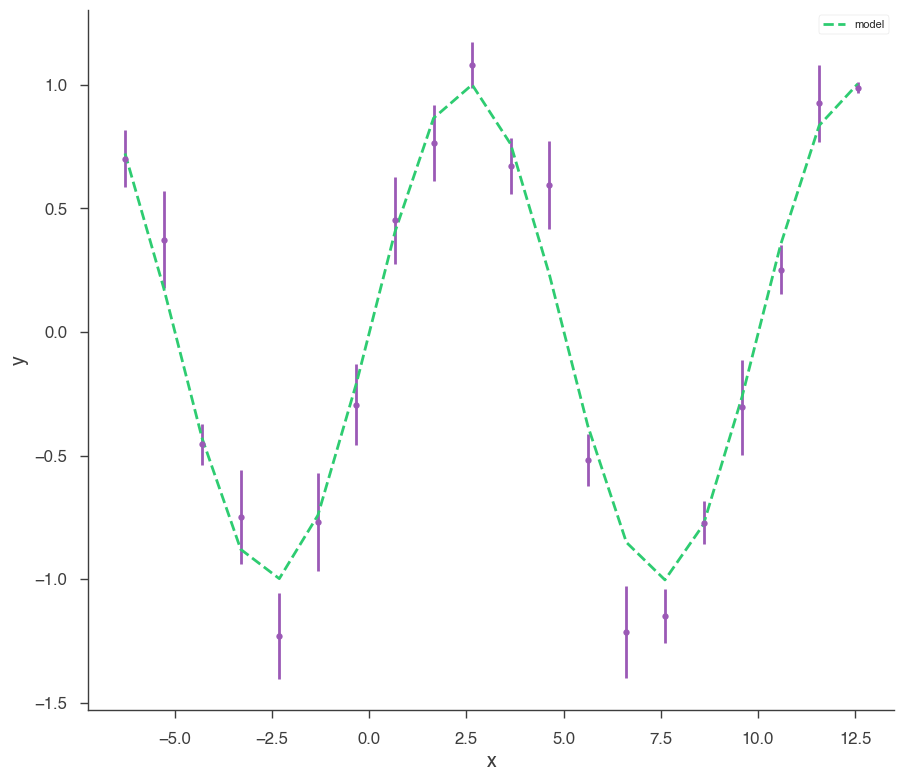

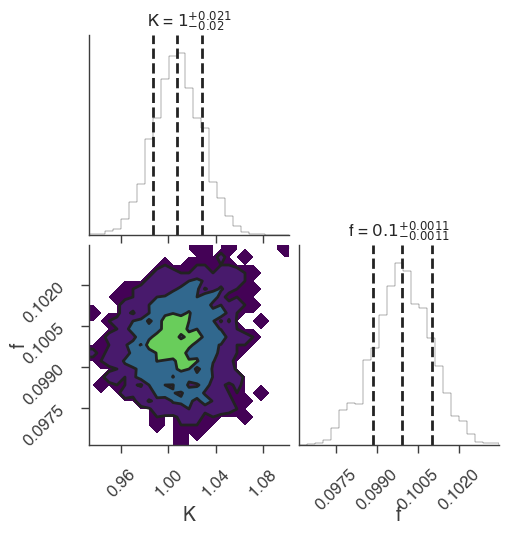

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=697687;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=773574;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

108it [00:00, 1077.43it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 133 | eff(%): 17.062 | loglstar:   -inf < -2997.694 <    inf | logz: -3004.818 +/-  0.119 | dlogz: 2974.836 >  0.010]

296it [00:00, 1542.69it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 421 | eff(%): 32.139 | loglstar:   -inf < -1621.781 <    inf | logz: -1628.993 +/-  0.116 | dlogz: 1608.887 >  0.010]

490it [00:00, 1718.88it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 843 | eff(%): 36.485 | loglstar:   -inf < -964.063 <    inf | logz: -971.949 +/-  0.125 | dlogz: 967.919 >  0.010]   

662it [00:00, 1595.42it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1404 | eff(%): 34.769 | loglstar:   -inf < -778.791 <    inf | logz: -785.348 +/-  0.108 | dlogz: 774.062 >  0.010]

823it [00:00, 1334.59it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2167 | eff(%): 30.859 | loglstar:   -inf < -691.288 <    inf | logz: -698.516 +/-  0.111 | dlogz: 687.032 >  0.010]

963it [00:00, 1249.71it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3032 | eff(%): 27.265 | loglstar:   -inf < -646.804 <    inf | logz: -653.630 +/-  0.109 | dlogz: 641.659 >  0.010]

1093it [00:00, 1097.19it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 4091 | eff(%): 23.807 | loglstar:   -inf < -611.310 <    inf | logz: -618.063 +/-  0.106 | dlogz: 605.695 >  0.010]

1208it [00:01, 926.61it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 5365 | eff(%): 20.597 | loglstar:   -inf < -581.416 <    inf | logz: -588.751 +/-  0.116 | dlogz: 576.305 >  0.010]  

1307it [00:01, 823.45it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 6632 | eff(%): 18.326 | loglstar:   -inf < -548.545 <    inf | logz: -555.803 +/-  0.111 | dlogz: 543.640 >  0.010]

1394it [00:01, 692.65it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 8279 | eff(%): 15.879 | loglstar:   -inf < -522.810 <    inf | logz: -530.618 +/-  0.118 | dlogz: 518.416 >  0.010]

1469it [00:01, 580.49it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 9704 | eff(%): 14.396 | loglstar:   -inf < -382.590 <    inf | logz: -392.352 +/-  0.137 | dlogz: 382.614 >  0.010]

1532it [00:01, 527.91it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 10899 | eff(%): 13.440 | loglstar:   -inf < -305.444 <    inf | logz: -314.846 +/-  0.131 | dlogz: 303.312 >  0.010]

1588it [00:01, 455.60it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 12625 | eff(%): 12.099 | loglstar:   -inf < -262.669 <    inf | logz: -271.294 +/-  0.126 | dlogz: 258.899 >  0.010]

1637it [00:02, 403.39it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 14072 | eff(%): 11.234 | loglstar:   -inf < -236.639 <    inf | logz: -244.688 +/-  0.121 | dlogz: 231.942 >  0.010]

1680it [00:02, 384.23it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 15217 | eff(%): 10.689 | loglstar:   -inf < -216.333 <    inf | logz: -224.607 +/-  0.123 | dlogz: 211.816 >  0.010] 

1720it [00:02, 268.87it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16630 | eff(%): 10.041 | loglstar:   -inf < -197.511 <    inf | logz: -206.199 +/-  0.125 | dlogz: 193.493 >  0.010]

1902it [00:02, 536.12it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 16970 | eff(%): 10.887 | loglstar:   -inf < -128.289 <    inf | logz: -137.069 +/-  0.122 | dlogz: 123.767 >  0.010]

2049it [00:02, 718.66it/s, batch: 0 | bound: 1 | nc: 9 | ncall: 17366 | eff(%): 11.469 | loglstar:   -inf < -95.390 <    inf | logz: -104.193 +/-  0.125 | dlogz: 90.579 >  0.010]  

2147it [00:02, 628.28it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17561 | eff(%): 11.887 | loglstar:   -inf < -79.200 <    inf | logz: -87.947 +/-  0.125 | dlogz: 74.381 >  0.010] 

2320it [00:03, 850.61it/s, batch: 0 | bound: 2 | nc: 8 | ncall: 17991 | eff(%): 12.547 | loglstar:   -inf < -57.688 <    inf | logz: -66.240 +/-  0.123 | dlogz: 52.244 >  0.010]

2430it [00:03, 749.18it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18228 | eff(%): 12.975 | loglstar:   -inf < -45.212 <    inf | logz: -53.762 +/-  0.124 | dlogz: 39.524 >  0.010]

2587it [00:03, 920.90it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 18583 | eff(%): 13.557 | loglstar:   -inf < -35.904 <    inf | logz: -44.078 +/-  0.121 | dlogz: 29.508 >  0.010]

2700it [00:03, 785.63it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18891 | eff(%): 13.924 | loglstar:   -inf < -29.606 <    inf | logz: -38.317 +/-  0.125 | dlogz: 23.537 >  0.010]

2890it [00:03, 1019.60it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19225 | eff(%): 14.651 | loglstar:   -inf < -22.396 <    inf | logz: -30.906 +/-  0.123 | dlogz: 15.722 >  0.010]

3018it [00:03, 1078.35it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 19570 | eff(%): 15.037 | loglstar:   -inf < -19.414 <    inf | logz: -27.753 +/-  0.122 | dlogz: 12.301 >  0.010]

3143it [00:03, 906.82it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19767 | eff(%): 15.508 | loglstar:   -inf < -17.081 <    inf | logz: -25.498 +/-  0.122 | dlogz:  9.794 >  0.010] 

3320it [00:04, 1097.55it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20123 | eff(%): 16.099 | loglstar:   -inf < -14.821 <    inf | logz: -23.165 +/-  0.121 | dlogz:  7.102 >  0.010]

3448it [00:04, 889.12it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20407 | eff(%): 16.492 | loglstar:   -inf < -13.719 <    inf | logz: -21.967 +/-  0.121 | dlogz:  5.648 >  0.010] 

3659it [00:04, 1146.33it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 20740 | eff(%): 17.227 | loglstar:   -inf < -12.232 <    inf | logz: -20.549 +/-  0.121 | dlogz:  3.838 >  0.010]

3811it [00:04, 1232.90it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21081 | eff(%): 17.659 | loglstar:   -inf < -11.525 <    inf | logz: -19.830 +/-  0.121 | dlogz:  2.852 >  0.010]

3954it [00:04, 1055.65it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21287 | eff(%): 18.148 | loglstar:   -inf < -10.981 <    inf | logz: -19.332 +/-  0.121 | dlogz:  2.135 >  0.010]

4131it [00:04, 1216.86it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21613 | eff(%): 18.681 | loglstar:   -inf < -10.524 <    inf | logz: -18.866 +/-  0.121 | dlogz:  1.454 >  0.010]

4270it [00:04, 967.90it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 21908 | eff(%): 19.056 | loglstar:   -inf < -10.264 <    inf | logz: -18.603 +/-  0.121 | dlogz:  1.068 >  0.010] 

4478it [00:05, 1202.09it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22198 | eff(%): 19.729 | loglstar:   -inf < -9.981 <    inf | logz: -18.321 +/-  0.121 | dlogz:  0.668 >  0.010]

4645it [00:05, 1308.12it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22541 | eff(%): 20.160 | loglstar:   -inf < -9.819 <    inf | logz: -18.166 +/-  0.121 | dlogz:  0.460 >  0.010]

4795it [00:05, 1042.35it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 22782 | eff(%): 20.595 | loglstar:   -inf < -9.718 <    inf | logz: -18.064 +/-  0.121 | dlogz:  0.330 >  0.010]

4989it [00:05, 1234.34it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23126 | eff(%): 21.117 | loglstar:   -inf < -9.629 <    inf | logz: -17.971 +/-  0.121 | dlogz:  0.216 >  0.010]

5135it [00:05, 1042.91it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23435 | eff(%): 21.454 | loglstar:   -inf < -9.580 <    inf | logz: -17.921 +/-  0.121 | dlogz:  0.158 >  0.010]

5347it [00:05, 1272.39it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23741 | eff(%): 22.058 | loglstar:   -inf < -9.523 <    inf | logz: -17.870 +/-  0.121 | dlogz:  0.101 >  0.010]

5509it [00:05, 1346.71it/s, batch: 0 | bound: 10 | nc: 12 | ncall: 24102 | eff(%): 22.392 | loglstar:   -inf < -9.496 <    inf | logz: -17.843 +/-  0.121 | dlogz:  0.072 >  0.010]

5662it [00:06, 1071.86it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24352 | eff(%): 22.783 | loglstar:   -inf < -9.477 <    inf | logz: -17.825 +/-  0.121 | dlogz:  0.053 >  0.010] 

5826it [00:06, 1192.18it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 24684 | eff(%): 23.134 | loglstar:   -inf < -9.463 <    inf | logz: -17.810 +/-  0.121 | dlogz:  0.038 >  0.010]

5965it [00:06, 987.05it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24970 | eff(%): 23.420 | loglstar:   -inf < -9.454 <    inf | logz: -17.801 +/-  0.121 | dlogz:  0.029 >  0.010] 

6153it [00:06, 1174.67it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 25286 | eff(%): 23.862 | loglstar:   -inf < -9.445 <    inf | logz: -17.792 +/-  0.121 | dlogz:  0.020 >  0.010]

6295it [00:06, 1230.40it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25607 | eff(%): 24.112 | loglstar:   -inf < -9.440 <    inf | logz: -17.788 +/-  0.121 | dlogz:  0.015 >  0.010]

6435it [00:06, 1008.33it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 25802 | eff(%): 24.466 | loglstar:   -inf < -9.436 <    inf | logz: -17.784 +/-  0.121 | dlogz:  0.011 >  0.010]

6940it [00:06, 1894.72it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26344 | eff(%): 26.298 | loglstar:   -inf < -9.427 <    inf | logz: -17.774 +/-  0.121 | dlogz:  0.001 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7174it [00:07, 791.24it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 26668 | eff(%): 26.345 | loglstar: -11.246 < -10.706 < -9.915 | logz: -17.773 +/-  0.125 | stop:  1.599]          

7348it [00:07, 901.99it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27018 | eff(%): 26.642 | loglstar: -11.246 < -10.335 < -9.915 | logz: -17.773 +/-  0.125 | stop:  1.599]

7521it [00:08, 859.81it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27301 | eff(%): 26.992 | loglstar: -11.246 < -10.042 < -9.915 | logz: -17.773 +/-  0.125 | stop:  1.599]

7898it [00:08, 1291.16it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27806 | eff(%): 28.148 | loglstar: -11.246 < -9.635 < -9.915 | logz: -17.773 +/-  0.125 | stop:  1.599]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8128it [00:09, 601.87it/s, batch: 2 | bound: 0 | nc: 2 | ncall: 28059 | eff(%): 28.968 | loglstar: -11.782 < -9.879 < -11.245 | logz: -17.779 +/-  0.103 | stop:  1.153]

8396it [00:09, 794.81it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28420 | eff(%): 29.057 | loglstar: -11.782 < -10.802 < -11.245 | logz: -17.779 +/-  0.103 | stop:  1.153]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8777it [00:10, 583.67it/s, batch: 3 | bound: 0 | nc: 2 | ncall: 28895 | eff(%): 30.375 | loglstar: -12.208 < -11.805 < -11.780 | logz: -17.781 +/-  0.095 | stop:  1.030]

9112it [00:10, 800.51it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29304 | eff(%): 30.796 | loglstar: -12.208 < -10.630 < -11.780 | logz: -17.781 +/-  0.095 | stop:  1.030]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9363it [00:10, 651.17it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29588 | eff(%): 31.645 | loglstar: -12.208 < -9.429 < -11.780 | logz: -17.781 +/-  0.095 | stop:  0.972] 

9363it [00:10, 870.41it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29588 | eff(%): 31.645 | loglstar: -12.208 < -9.429 < -11.780 | logz: -17.781 +/-  0.095 | stop:  0.972]

23:21:12 INFO      fit restored to maximum of posterior                                         ]8;id=921358;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=718466;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=90709;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=826515;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.017 +0.022,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 +/- 0.11) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.431733
total,-9.431733


Values of statistical measures:

,statistical measures
AIC,23.569349
BIC,24.854931
DIC,22.873601
PDIC,1.995287
log(Z),-7.717660


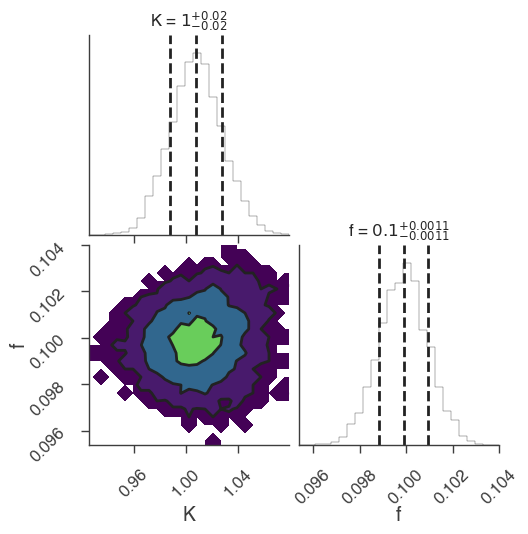

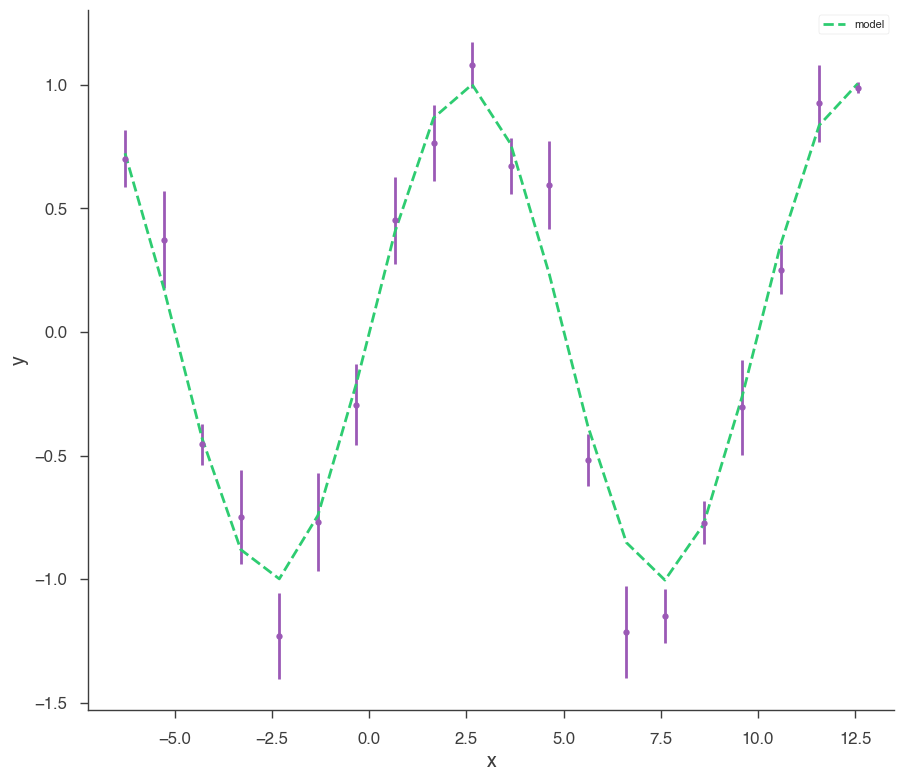

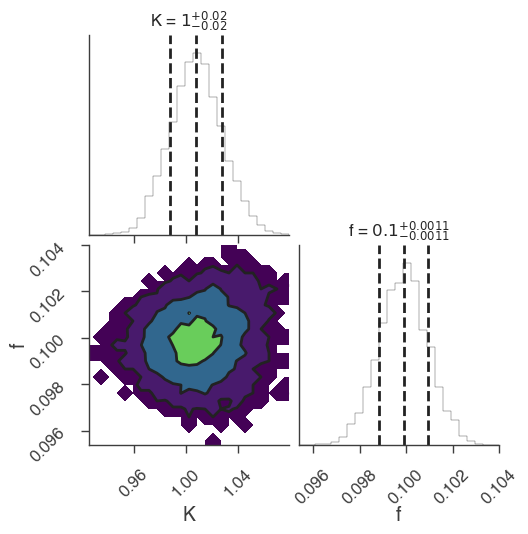

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=71594;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=819545;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 53.97it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:11, 52.96it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:11, 53.93it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:10, 58.87it/s]

Sampling progress :   5%|▌         | 33/625 [00:00<00:09, 64.32it/s]

Sampling progress :   6%|▋         | 40/625 [00:00<00:08, 65.13it/s]

Sampling progress :   8%|▊         | 48/625 [00:00<00:08, 68.35it/s]

Sampling progress :   9%|▉         | 55/625 [00:00<00:08, 68.31it/s]

Sampling progress :  10%|▉         | 62/625 [00:00<00:08, 68.06it/s]

Sampling progress :  11%|█         | 69/625 [00:01<00:08, 67.22it/s]

Sampling progress :  12%|█▏        | 76/625 [00:01<00:08, 67.28it/s]

Sampling progress :  13%|█▎        | 84/625 [00:01<00:07, 69.31it/s]

Sampling progress :  15%|█▍        | 92/625 [00:01<00:07, 71.91it/s]

Sampling progress :  16%|█▌        | 100/625 [00:01<00:07, 70.93it/s]

Sampling progress :  17%|█▋        | 108/625 [00:01<00:07, 70.47it/s]

Sampling progress :  19%|█▊        | 116/625 [00:01<00:07, 71.44it/s]

Sampling progress :  20%|█▉        | 124/625 [00:01<00:07, 69.43it/s]

Sampling progress :  21%|██▏       | 133/625 [00:01<00:06, 72.95it/s]

Sampling progress :  23%|██▎       | 141/625 [00:02<00:06, 73.36it/s]

Sampling progress :  24%|██▍       | 149/625 [00:02<00:06, 72.26it/s]

Sampling progress :  25%|██▌       | 157/625 [00:02<00:06, 70.59it/s]

Sampling progress :  26%|██▋       | 165/625 [00:02<00:06, 70.04it/s]

Sampling progress :  28%|██▊       | 173/625 [00:02<00:06, 68.93it/s]

Sampling progress :  29%|██▉       | 180/625 [00:02<00:06, 67.43it/s]

Sampling progress :  30%|███       | 188/625 [00:02<00:06, 70.57it/s]

Sampling progress :  31%|███▏      | 196/625 [00:02<00:06, 68.01it/s]

Sampling progress :  32%|███▏      | 203/625 [00:02<00:06, 66.48it/s]

Sampling progress :  34%|███▍      | 212/625 [00:03<00:05, 70.31it/s]

Sampling progress :  35%|███▌      | 220/625 [00:03<00:05, 71.17it/s]

Sampling progress :  36%|███▋      | 228/625 [00:03<00:05, 68.75it/s]

Sampling progress :  38%|███▊      | 236/625 [00:03<00:05, 70.96it/s]

Sampling progress :  39%|███▉      | 244/625 [00:03<00:05, 72.14it/s]

Sampling progress :  40%|████      | 252/625 [00:03<00:05, 73.78it/s]

Sampling progress :  42%|████▏     | 261/625 [00:03<00:04, 76.64it/s]

Sampling progress :  43%|████▎     | 269/625 [00:03<00:04, 73.86it/s]

Sampling progress :  44%|████▍     | 277/625 [00:04<00:04, 70.57it/s]

Sampling progress :  46%|████▌     | 285/625 [00:04<00:04, 70.76it/s]

Sampling progress :  47%|████▋     | 293/625 [00:04<00:04, 72.05it/s]

Sampling progress :  48%|████▊     | 301/625 [00:04<00:04, 72.97it/s]

Sampling progress :  49%|████▉     | 309/625 [00:04<00:04, 71.30it/s]

Sampling progress :  51%|█████     | 317/625 [00:04<00:04, 68.07it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:04<00:04, 67.43it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:04<00:04, 71.02it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:04<00:04, 61.75it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:05<00:04, 67.31it/s]

Sampling progress :  57%|█████▋    | 357/625 [00:05<00:04, 66.95it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:05<00:03, 67.06it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:05<00:03, 70.21it/s]

Sampling progress :  61%|██████    | 380/625 [00:05<00:03, 71.44it/s]

Sampling progress :  62%|██████▏   | 388/625 [00:05<00:03, 67.78it/s]

Sampling progress :  63%|██████▎   | 396/625 [00:05<00:03, 69.77it/s]

Sampling progress :  65%|██████▍   | 404/625 [00:05<00:03, 69.76it/s]

Sampling progress :  66%|██████▌   | 412/625 [00:05<00:02, 71.12it/s]

Sampling progress :  67%|██████▋   | 420/625 [00:06<00:02, 73.15it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:06<00:02, 71.97it/s]

Sampling progress :  70%|██████▉   | 436/625 [00:06<00:02, 74.14it/s]

Sampling progress :  71%|███████   | 445/625 [00:06<00:02, 75.46it/s]

Sampling progress :  72%|███████▏  | 453/625 [00:06<00:02, 72.35it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:06<00:02, 71.39it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:06<00:02, 74.95it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:06<00:01, 75.47it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:06<00:01, 73.63it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:07<00:01, 71.23it/s]

Sampling progress :  80%|████████  | 502/625 [00:07<00:02, 56.57it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:07<00:01, 58.79it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:07<00:01, 65.06it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:07<00:01, 65.98it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:07<00:01, 70.95it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:07<00:01, 74.09it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:07<00:01, 68.61it/s]

Sampling progress :  89%|████████▉ | 559/625 [00:08<00:00, 69.61it/s]

Sampling progress :  91%|█████████ | 567/625 [00:08<00:00, 69.69it/s]

Sampling progress :  92%|█████████▏| 575/625 [00:08<00:00, 69.86it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:08<00:00, 71.99it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:08<00:00, 71.55it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:08<00:00, 64.28it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:08<00:00, 68.02it/s]

Sampling progress :  98%|█████████▊| 615/625 [00:08<00:00, 68.56it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:08<00:00, 70.41it/s]

Sampling progress : 100%|██████████| 625/625 [00:09<00:00, 69.30it/s]

23:21:22 INFO      fit restored to maximum of posterior                                         ]8;id=192197;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=731207;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=696198;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=700536;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 17


Scale Factor: 1.435667


Mean Integrated Autocorrelation Time: 3.04


Effective Sample Size: 4117.19


Number of Log Probability Evaluations: 65024


Effective Samples per Log Probability Evaluation: 0.063318


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.005 -0.018 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 +/- 0.11) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.431753
total,-9.431753


Values of statistical measures:

,statistical measures
AIC,23.569389
BIC,24.854971
DIC,22.958194
PDIC,2.039424


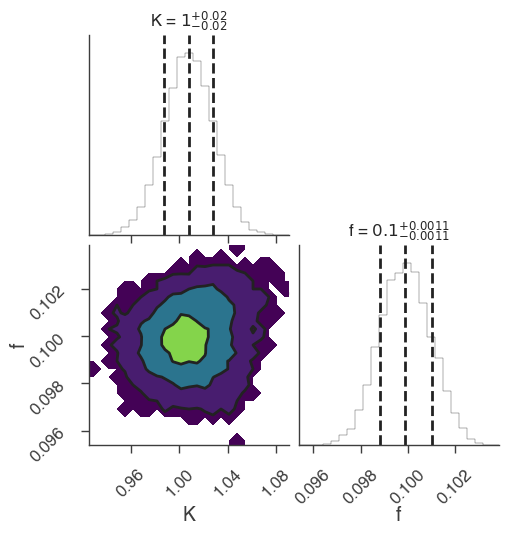

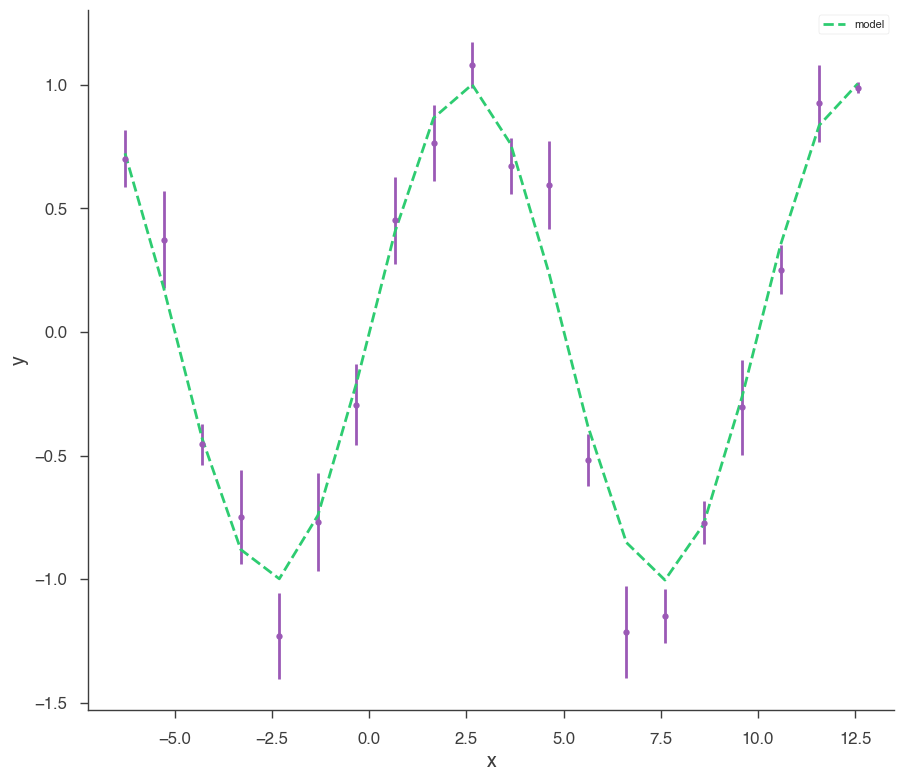

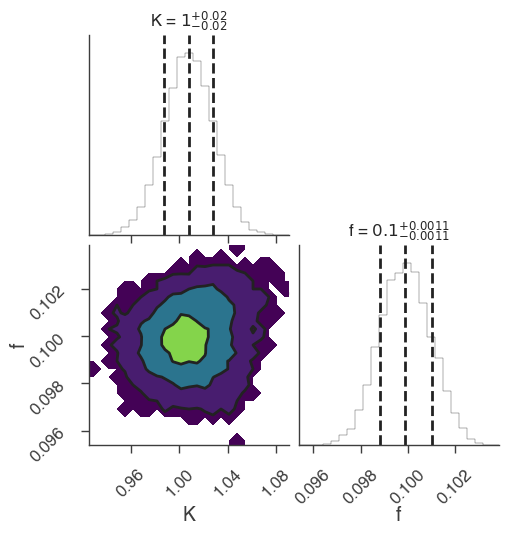

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

23:21:23 INFO      sampler set to ultranest                                                ]8;id=45143;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=716814;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 12175


[ultranest]   logZ = -17.77 +- 0.09989


[ultranest] Effective samples strategy satisfied (ESS = 961.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


23:21:31 INFO      fit restored to maximum of posterior                                         ]8;id=394581;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=260002;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=229899;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=305345;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.004 -0.016 +0.023,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.99 +/- 0.10) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.433318
total,-9.433318


Values of statistical measures:

,statistical measures
AIC,23.572519
BIC,24.858101
DIC,22.630547
PDIC,1.875740
log(Z),-7.725331


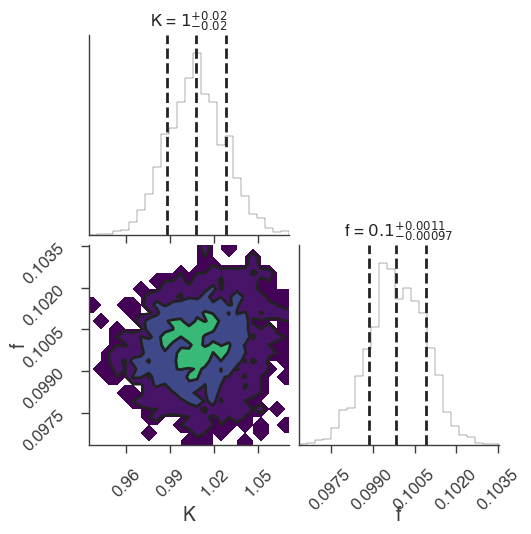

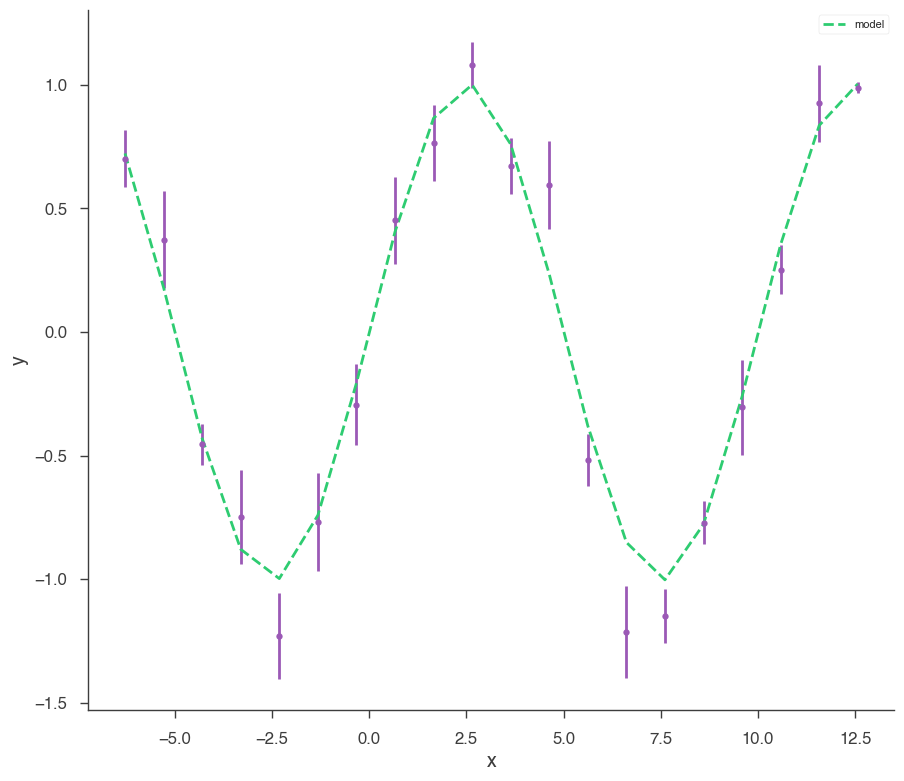

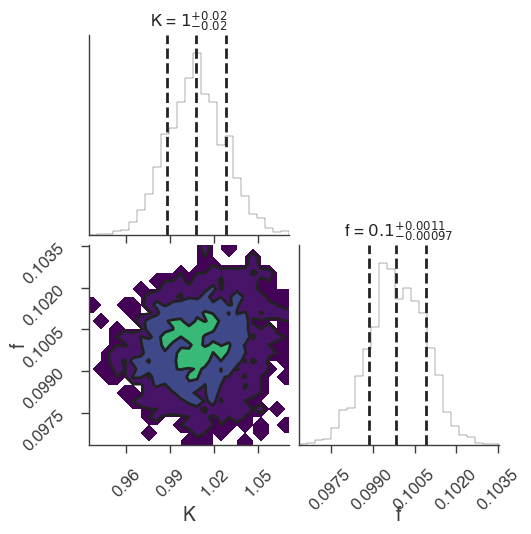

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()